In [236]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [237]:
df = pd.read_csv("tweets-viral-delete.csv")
df.head()

,likes,retweets,replies,is_viral,to_delete
0,10,2,0,0,0
1,123,14,5,1,0
2,203,34,29,1,0
3,23,2,3,0,0
4,1,0,0,0,1


In [238]:
def categorize(row):
    if row['is_viral'] == 1:
        return 'Viral'
    elif row['to_delete'] == 1:
        return 'To Delete'
    else:
        return 'Normal'


df['category'] = df.apply(categorize, axis=1)
df = df.drop('is_viral', axis=1)
df = df.drop('to_delete', axis=1)
df.head()

,likes,retweets,replies,category
0,10,2,0,Normal
1,123,14,5,Viral
2,203,34,29,Viral
3,23,2,3,Normal
4,1,0,0,To Delete


In [239]:
df['category'].value_counts()

category
Normal       58
Viral        26
To Delete    16
Name: count, dtype: int64

In [240]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape

(80, 3)

In [242]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(x_train, y_train)
y_pred = clf_random_forest.predict(x_test)

In [243]:
x_test

array([[ 29,   2,   2],
       [ 65,   4,   2],
       [203,  34,  29],
       [ 28,   0,  10],
       [ 33,   3,   3],
       [ 50,   5,   5],
       [  0,   0,  11],
       [  0,   0,   5],
       [ 39,   3,   9],
       [ 48,   3,  20],
       [ 15,   2,   0],
       [  1,   0,   4],
       [ 34,   1,   1],
       [ 52,  10,   1],
       [ 38,   4,   4],
       [144,  20,   8],
       [  9,   1,   1],
       [167,  22,  10],
       [ 11,   2,   4],
       [298,  38,  32]])

In [244]:
y_test

array(['Normal', 'Normal', 'Viral', 'Normal', 'Normal', 'Normal',
       'To Delete', 'To Delete', 'Normal', 'Normal', 'Normal',
       'To Delete', 'Normal', 'Normal', 'Normal', 'Viral', 'Normal',
       'Viral', 'Normal', 'Viral'], dtype=object)

In [245]:
y_pred

array(['Normal', 'Normal', 'Viral', 'Normal', 'Normal', 'Normal',
       'Normal', 'To Delete', 'Normal', 'Normal', 'Normal', 'To Delete',
       'Normal', 'Normal', 'Normal', 'Viral', 'Normal', 'Viral', 'Normal',
       'Viral'], dtype=object)

In [246]:
accuracy_score(y_test, y_pred)

0.95

In [248]:
df_compare = pd.DataFrame(
    data={
        'likes': x_test[:,0],
        'retweets': x_test[:,1],
        'replies': x_test[:,2],
        'predicted_value': y_pred, 
        'real_value': y_test
    }, 
    columns=['likes', 'retweets', 'replies', 'predicted_value', 'real_value'])
df_compare

,likes,retweets,replies,predicted_value,real_value
0,29,2,2,Normal,Normal
1,65,4,2,Normal,Normal
2,203,34,29,Viral,Viral
3,28,0,10,Normal,Normal
4,33,3,3,Normal,Normal
5,50,5,5,Normal,Normal
6,0,0,11,Normal,To Delete
7,0,0,5,To Delete,To Delete
8,39,3,9,Normal,Normal
9,48,3,20,Normal,Normal


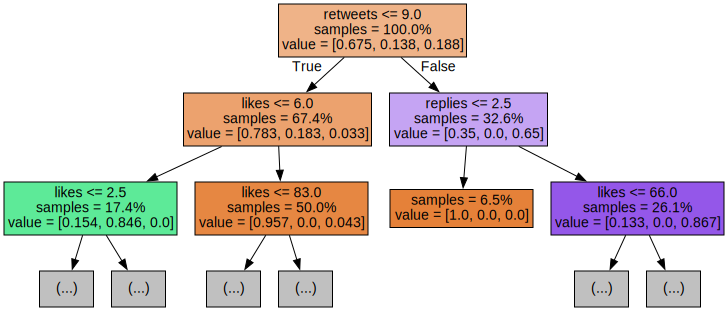

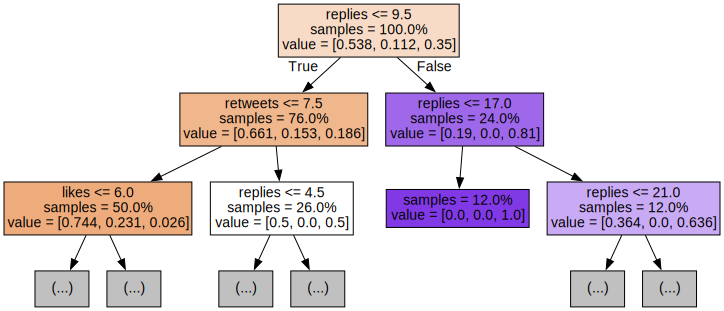

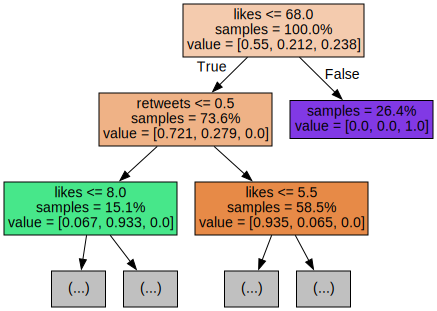

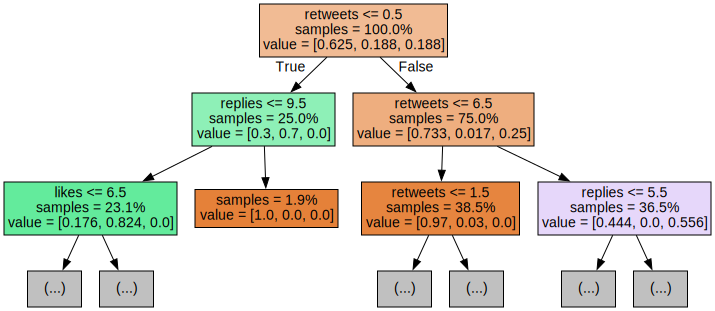

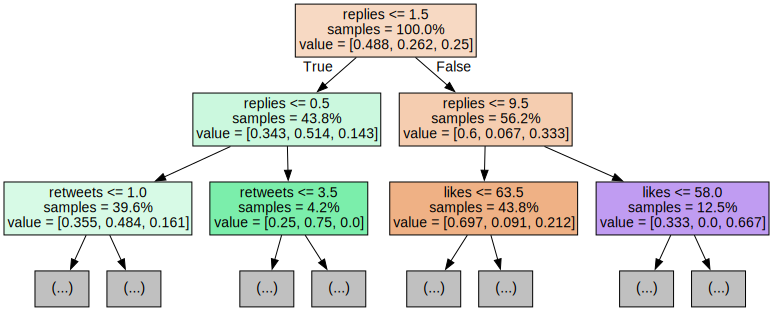

In [247]:
from sklearn.tree import export_graphviz

for i in range(5):
    tree = clf_random_forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=df.iloc[:,:-1].columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)